# Preprocessing

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import PIL.Image
import os
import numpy as np
import matplotlib.pyplot as plt 
from skimage.color import rgb2grey
import matplotlib as mpl
import cv2
import random
import pickle
from sklearn.externals import joblib
from google.colab import files

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
mask_dir = '/content/drive/My Drive/Mask Generation/7_mask'
unmasked_dir = '/content/drive/My Drive/Mask Generation/7_rgb'

def get_image(imageID, root, type):
    """
    Converts an image number into the file path where the image is located, 
    opens the image, and returns the image as a numpy array.
    """
    filename = "{}.png".format(imageID)
    file_path = os.path.join(root, filename)
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if type == "HSV":
      img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    return img

In [ ]:
def prepare_inputs(type):
  inputs = []
  num_images = 5 # Change depending on number of images
  for i in range(num_images):
    if type == "RGB":
      inputs.append(get_image(i+1, unmasked_dir, "RGB"))
    elif type == "HSV":
      inputs.append(get_image(i+1, unmasked_dir, "HSV"))
  return inputs

RGB_inputs = prepare_inputs("RGB")
HSV_inputs = prepare_inputs("HSV")
#print(inputs) # all images
#print(inputs[0]) # one image
#print(inputs[0][0]) # specific row/column
#print(RGB_inputs[0][0][0]) #individual pixel
#print(HSV_inputs[0][0][0])

(2160, 3840, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


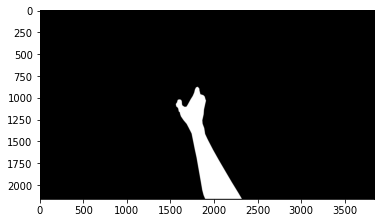

(2160, 3840, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


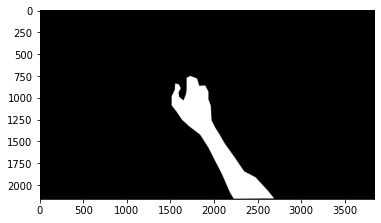

(2160, 3840, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


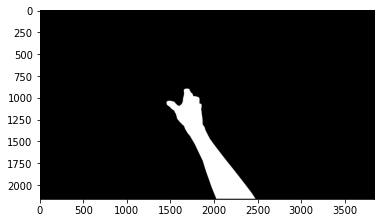

(2160, 3840, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


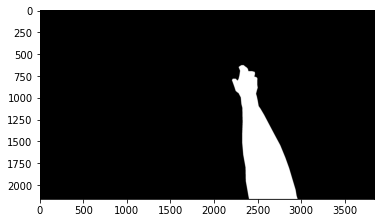

(2160, 3840, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


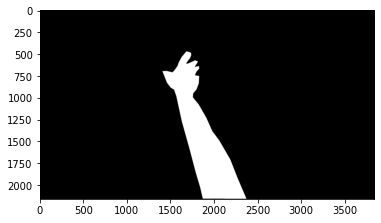

In [ ]:
# This function finds all the pixels that aren't black (RGB [0,0,0]) and adds them to a list of labels (0 = not hand pixel, 1 = hand pixel)
def prepare_labels():
  labels = []
  num_images = 5 # change based on number of images
  for i in range(num_images): # Do this for all images
    img = get_image(i+1, mask_dir, "RGB")
    non_black_pixels_mask = np.any(img != [0, 0, 0], axis=-1)  
    image_copy = img.copy()
    labels.append(non_black_pixels_mask.astype(int))
    image_copy[non_black_pixels_mask] = [255, 255, 255]
    print(image_copy.shape)
    print(image_copy)
    plt.imshow(image_copy)
    plt.show()
  return labels
labels = prepare_labels()

In [ ]:
# Randomly select pixels (ex. 10k hand, 10k non hand: = pixels = np.zeros((20000, 3)))
# Extract RGB information, give label y = 0 or y = -1 depending on classifier()

def give_labels(classifier, color_type):
  num_images = 5 # change based on number of images
  num_pixels = num_images * 1000 * 2
  pixels = np.zeros((num_pixels, 3))
  dataset_labels = np.zeros((num_pixels, 1))
  pixel_num = 0
  for i in range(num_images): # iterate through RGB (unmasked) and label (mask) pairs for images
    hand_pixels = np.argwhere(labels[i] == 1) # all hand pixels
    non_hand_pixels = np.argwhere(labels[i] == 0) # all non hand pixels
    hand_samples = hand_pixels[np.random.choice(hand_pixels.shape[0], 1000, replace=False), :] # Randomly choose 1000 hand pixels
    non_hand_samples = non_hand_pixels[np.random.choice(non_hand_pixels.shape[0], 1000, replace=False), :] # Randomly choose 1000 non hand pixels
  
    for hand_pixel in hand_samples:
      if color_type == "RGB":
        pixels[pixel_num] = RGB_inputs[i][hand_pixel[0]][hand_pixel[1]] # Obtain the rgb information from the hand pixel
      elif color_type == "HSV":
        pixels[pixel_num] = HSV_inputs[i][hand_pixel[0]][hand_pixel[1]] # Obtain the hsv information from the hand pixel
      dataset_labels[pixel_num] = 1
      print("pixel_num = ")    
      print(pixel_num)
      print("color value = ")
      print(pixels[pixel_num])
      print("label = ")
      print(dataset_labels[pixel_num])
      pixel_num = pixel_num + 1
  
    for non_hand_pixel in non_hand_samples:
      if color_type == "RGB":
        pixels[pixel_num] = RGB_inputs[i][non_hand_pixel[0]][non_hand_pixel[1]] # Obtain the rgb information from the non hand pixel
      elif color_type == "HSV":
        pixels[pixel_num] = HSV_inputs[i][non_hand_pixel[0]][non_hand_pixel[1]] # Obtain the hsv information from the non hand pixel
      if classifier == "Random Forest":
        dataset_labels[pixel_num] = 0 
      elif classifier == "SVM":
        dataset_labels[pixel_num] = -1
      print("pixel_num = ")    
      print(pixel_num)
      print("color value = ")
      print(pixels[pixel_num])
      print("label = ")
      print(dataset_labels[pixel_num])
      pixel_num = pixel_num + 1
  return pixels, dataset_labels

# Defining the Model

Random Forest Classifier, HSV

In [ ]:
pixels, dataset_labels = give_labels("Random Forest", "HSV")
print(pixels.shape) # Confirming number of pixels chosen
print(pixels) 
print(dataset_labels.shape) # Confirming that there are # labels matches pixels chosen
print(dataset_labels) 
print(pixels[0]) # RGB value of the first pixel
print(dataset_labels[0]) # Label corresponding to the first pixel

Streaming output truncated to the last 5000 lines.
label = 
[0.]
pixel_num = 
9170
color value = 
[ 21.  40. 174.]
label = 
[0.]
pixel_num = 
9171
color value = 
[129.  27.  67.]
label = 
[0.]
pixel_num = 
9172
color value = 
[ 76.  20. 137.]
label = 
[0.]
pixel_num = 
9173
color value = 
[ 10.  14. 109.]
label = 
[0.]
pixel_num = 
9174
color value = 
[ 23.  71. 126.]
label = 
[0.]
pixel_num = 
9175
color value = 
[ 43.  26. 137.]
label = 
[0.]
pixel_num = 
9176
color value = 
[ 15.  19. 159.]
label = 
[0.]
pixel_num = 
9177
color value = 
[ 50.  34. 113.]
label = 
[0.]
pixel_num = 
9178
color value = 
[ 30.   3. 161.]
label = 
[0.]
pixel_num = 
9179
color value = 
[ 18.  85. 129.]
label = 
[0.]
pixel_num = 
9180
color value = 
[128.   5. 203.]
label = 
[0.]
pixel_num = 
9181
color value = 
[ 12.  18. 142.]
label = 
[0.]
pixel_num = 
9182
color value = 
[ 19.  20. 102.]
label = 
[0.]
pixel_num = 
9183
color value = 
[ 20.  27. 143.]
label = 
[0.]
pixel_num = 
9184
color value = 
[ 19. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pixels,dataset_labels,test_size=0.2)
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=16, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.973
Precision: 0.9731343283582089


In [ ]:
print(x_test)
print(y_test)

[[ 24.  85. 185.]
 [ 21.  95. 150.]
 [176.  14. 125.]
 ...
 [135.  15.  34.]
 [176.  16. 111.]
 [ 30.   6. 174.]]
[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
# Save the model as a pickle in a file
joblib.dump(model, 'model.pkl')
  
# Load the model from the file
random_forest_hsv = joblib.load('model.pkl') 
files.download('model.pkl')

# Use the loaded model to make predictions
random_forest_hsv.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([1., 1., 0., ..., 0., 0., 0.])

# Making Predictions

In [ ]:
# Load the model from the file
random_forest_hsv = joblib.load('model.pkl') 

In [ ]:
test2 = get_image(2, unmasked_dir, "HSV")
res = cv2.resize(test2, dsize=(480, 270), interpolation=cv2.INTER_CUBIC)

generated_mask = random_forest_hsv.predict([res[0][0]]) # test to see if this format works
generated_mask = np.zeros((270, 480, 3))
for i in range(270):
  print(i)
  for x in range(480):
    if random_forest_hsv.predict([res[i][x]])[0] == 0:
      generated_mask[i][x] = [0, 0, 0]
    else:
      generated_mask[i][x] = [255, 255, 255]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


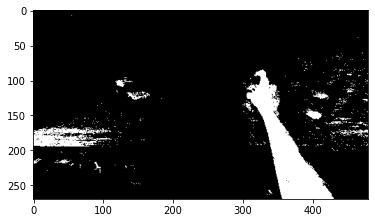

In [ ]:
plt.imshow(generated_mask)
plt.show()